# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.


We generate a random secret floating number. Then we use hamming weight model to guess the number.

We develop a method of devide-and-conquer to quickly arrive to a close number with a defined precision.

## Guessing...

In [67]:
import numpy as np
import pandas as pd
import hashlib
from guess_range import *
from pprint import pprint

import pathlib
TEST_RESULT_DIR = './results'
pathlib.Path(TEST_RESULT_DIR).mkdir(parents=True, exist_ok=True) 

In [2]:
import binascii

def secret_signature(secret_numbers):
    m = hashlib.md5()
    m.update(secret_numbers)
    a = m.digest()
    s = 2
    n = [0] * s
    for idx in range(len(a)):
        i = idx % s
        n[i] = (n[i] + a[idx]) % 256
    return binascii.hexlify(bytes(n))        

## Test single point

In [3]:
SECRET_VALUE = 'secret value'

guess_range = (-5.0, 5.0)
precision = 1e-8
exponent= 0

In [11]:
# secret_number = random.uniform(guess_range[0] / 10, guess_range[1] / 10)
secret_number = -0.746673921 * (10 ** exponent)
known_input_set = generate_known_inputs(exps=[-2,0,2], nsize=500)
secret_hws = (known_input_set * secret_number).applymap(lambda x: hamming_weight(x))
#secret_number = np.round(secret_number, int(-np.log10(precision)))
print('secret_number = %.08f' % secret_number)
number_of_guess_values = 500

secret_number = -0.74667392


In [12]:
%%time
candidates = get_range_candidates(secret_hws=secret_hws,
                                  guess_range=guess_range,
                                  known_input_set=known_input_set,
                                  precision=precision,
                                  number_values=number_of_guess_values)
candidates

get_range_candidates (-5.0, 5.0)
get_range_candidates (-5.0, 0.0)
inputs_idx=-2
guess_number_range
inputs_idx=0
guess_number_range
inputs_idx=2
guess_number_range
filter_duplicated_ranges
get_range_candidates (0.0, 5.0)
inputs_idx=-2
guess_number_range
inputs_idx=0
guess_number_range
inputs_idx=2
guess_number_range
filter_duplicated_ranges
filter_duplicated_ranges
CPU times: user 1min 18s, sys: 1.17 s, total: 1min 19s
Wall time: 1min 19s


,0,1,2
low value,-0.746674,0.746674,0.373337
high value,-0.746674,0.746674,0.373337
correlation,1.000000,0.927967,0.877956
input id,0.000000,2.000000,0.000000


In [13]:
%%time
weight_value = dismiss_bad_ranges(secret_hws, candidates, known_input_set, number_values=number_of_guess_values)
print('secret_number=', secret_number)
print('guessed_value=', (weight_value[HIGH_VALUE]+weight_value[LOW_VALUE])/2)
print('weight_value=', weight_value)

secret_number= -0.746673921
guessed_value= -0.7466739183291793
weight_value= low value     -0.746674
high value    -0.746674
correlation    1.000000
input id       0.000000
Name: 0, dtype: float64
CPU times: user 1.97 s, sys: 36 ms, total: 2.01 s
Wall time: 2 s


## Test with guess_number_range in [0.1, 1]

In [63]:
%%time
number_of_tests = 100
precision = 1e-8
exponent = 0
guess_range=(0.099, 10.0 ** exponent)
secret_numbers = np.random.uniform(0.099, 1, number_of_tests) * (10 ** exponent)
known_inputs = generate_known_inputs(exps=(exponent+1), nsize=500)

GUESSED_VALUE= 'guessed_value'
ERROR='error'

df = pd.DataFrame(columns=[LOW_VALUE, HIGH_VALUE, CORRELATION, GUESSED_VALUE, ERROR], index=secret_numbers)
for secret_number in secret_numbers:
    l, h, c = guess_number_range((known_inputs * secret_number).apply(lambda x: hamming_weight(x)),
                            guess_range, precision, known_inputs, number_values=200)
    s = pd.Series([l, h, c, (l+h)/2, abs(((l+h)/2-secret_number)/secret_number)], index=df.columns)
    df.loc[secret_number] = s
    print('----secret_number=', secret_number)
    print('guessed_number=', s[GUESSED_VALUE], 'correlation=', c, 'error=', s[ERROR])

guess_number_range
----secret_number= 0.3562388464528947
guessed_number= 0.35623884410783657 correlation= 1.0 error= 6.582825458307061e-09
guess_number_range
----secret_number= 0.5570101717824029
guessed_number= 0.5570101688839496 correlation= 1.0 error= 5.203591248450037e-09
guess_number_range
----secret_number= 0.6849174169508093
guessed_number= 0.6849174200110139 correlation= 1.0 error= 4.467990532122575e-09
guess_number_range
----secret_number= 0.30679105102065946
guessed_number= 0.30679105055704714 correlation= 0.9999999999999999 error= 1.5111663578916533e-09
guess_number_range
----secret_number= 0.379369904578024
guessed_number= 0.3793699034042656 correlation= 0.9999999999999999 error= 3.0939682078755705e-09
guess_number_range
----secret_number= 0.43197436040789294
guessed_number= 0.4319743584431708 correlation= 1.0 error= 4.5482379113525826e-09
guess_number_range
----secret_number= 0.3843240218365953
guessed_number= 0.38432402386143805 correlation= 1.0 error= 5.268582297427327e-

----secret_number= 0.16062054413848412
guessed_number= 0.1606205451823771 correlation= 0.9999999999999998 error= 6.499124863899763e-09
guess_number_range
----secret_number= 0.45529284150002847
guessed_number= 0.4552928439490497 correlation= 0.9999999999999999 error= 5.379002226308101e-09
guess_number_range
----secret_number= 0.6988964970014852
guessed_number= 0.69889649509266 correlation= 0.9999999999999999 error= 2.731198548246249e-09
guess_number_range
----secret_number= 0.13016204619415608
guessed_number= 0.13016204748675222 correlation= 1.0 error= 9.930668570663523e-09
guess_number_range
----secret_number= 0.728645818922861
guessed_number= 0.7286458208821714 correlation= 0.9999999999999999 error= 2.6889751381880297e-09
guess_number_range
----secret_number= 0.45771480174161094
guessed_number= 0.4577148040942848 correlation= 1.0 error= 5.140043154767595e-09
guess_number_range
----secret_number= 0.28648607719329033
guessed_number= 0.2864860791005194 correlation= 1.0 error= 6.657318429

In [69]:
from os import path

fname = path.join(TEST_RESULT_DIR, 'edgeaisec_results-%d.csv' % number_of_tests)
df.to_csv(fname)
print('save results in %s' % fname)

save results in ./results/edgeaisec_results-100.csv


### Guessed values

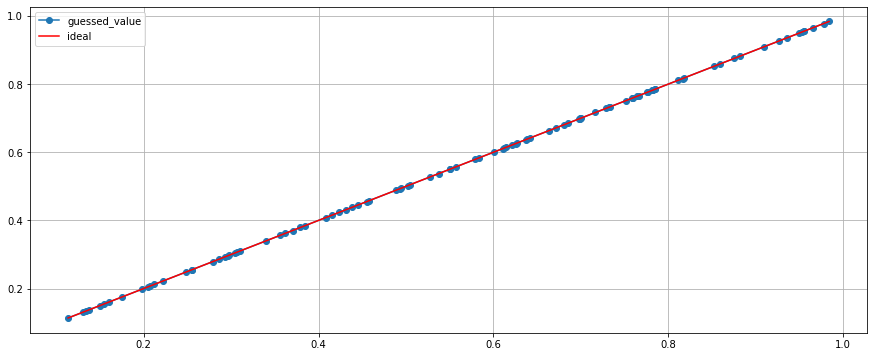

In [64]:
df.sort_index(inplace=True)
ax = df[GUESSED_VALUE].plot(figsize=(15,6), marker='o')
ax.plot([min(secret_numbers), max(secret_numbers)], [min(secret_numbers), max(secret_numbers)], color='red', label='ideal')
ax.legend()
ax.grid()

### Error

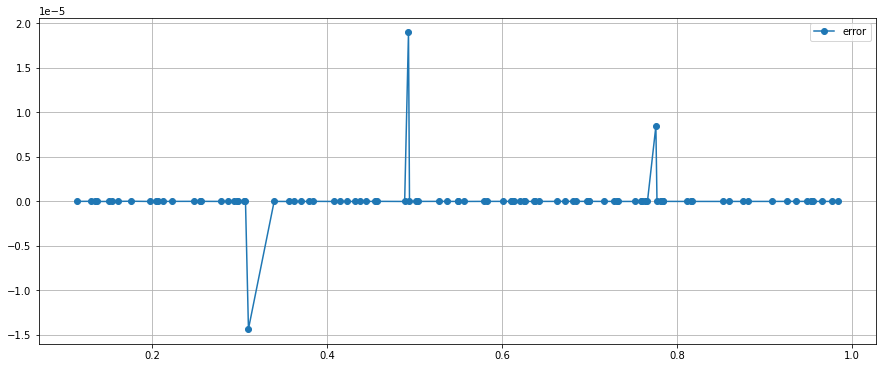

In [65]:
ax = df[ERROR].plot(figsize=(15,6), marker='o')
ax.legend()
ax.grid()

### Correlation

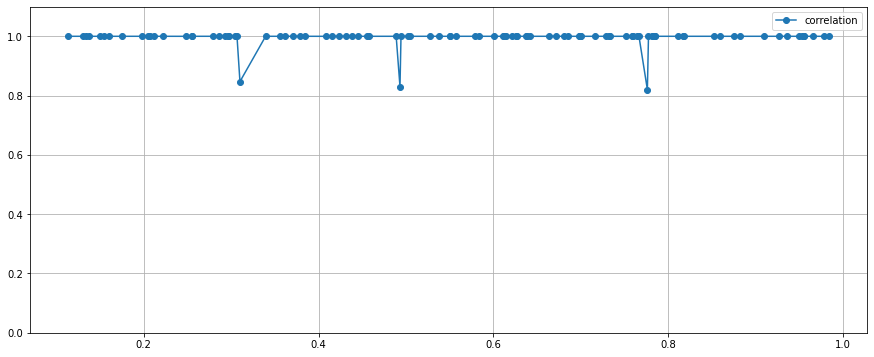

In [66]:
ax = df[CORRELATION].plot(figsize=(15,6), marker='o')
ax.set_ylim(0.0, 1.1)
ax.legend()
ax.grid()

---
---
---

In [22]:
%%time
secret_hw=(known_inputs * secret_number).applymap(lambda x: hamming_weight(x))
single_correlations = compute_corr(secret_hw=secret_hw, known_inputs=known_inputs,
                                   guess_range=guess_range, number_values=number_of_guess_values)
single_correlations.sort_values(ascending=False, inplace=True)
single_correlations.iloc[:10]

AttributeError: 'Series' object has no attribute 'applymap'

In [9]:
ax = single_correlations.sort_index().plot(figsize=(15, 6), label='HW correlations')
ax.vlines(secret_number, 
          single_correlations.min(),
          single_correlations.max(),
          color='red', label='secret value')
ax.legend()
ax.grid()

NameError: name 'single_correlations' is not defined

In [ ]:
%%time
TEST_VALUE = 'test value'
low_range, high_range = guess_range

results = pd.DataFrame()
known_input_size = 2000

for (low_range, high_range) in get_subranges(guess_range, precision):
    pprint('searching in the range %f - %f' % (low_range, high_range))
    exponent = np.floor(-np.log10(np.max(np.abs(np.asarray([low_range, high_range])))))
    for e in [exponent-1, exponent, exponent+1]:
        known_inputs = np.random.uniform(-10 ** e, 10 ** e, known_input_size)
        print(e, known_inputs.min(), known_inputs.max())
        secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)

        corr = compute_corr(secret_hw=secret_hw, known_inputs=known_inputs,
                                           guess_range=(low_range, high_range), number_values=number_of_guess_values)
        df = pd.DataFrame([corr.index, corr.values], index=[TEST_VALUE, CORRELATION])
        df.loc[INPUT_ID] = e
        df.loc[LOW_VALUE] = low_range
        df.loc[HIGH_VALUE] = high_range
        results = pd.concat([results, df], axis=1, ignore_index=True)

In [ ]:
a = results.T
for idx, df in a.groupby(INPUT_ID):
    d = df[CORRELATION].reset_index(drop=True)
    ax = d.plot(figsize=(15,8), label=idx)
    ax.legend()
    ax.grid()

In [ ]:
a = results.T
a.sort_values(CORRELATION, ascending=False)[:10]

In [ ]:
a = results.T
for g in a[HIGH_VALUE].unique():
    b = a[a[HIGH_VALUE] == g]
    c = b[[TEST_VALUE, CORRELATION]].set_index(TEST_VALUE).sort_index()
    ax = c.plot(figsize=(15,6))
    if secret_number <= g:
        ax.vlines(secret_number, 
                  c.min(),
                  c.max(),
                  color='red', label='secret value')
    ax.legend()
    ax.grid()

### Run advanced search

In [ ]:
%%time
known_input_size = 1000
print('secret_number = %f' % secret_number)
print('guess_range = %s' % str(guess_range))
results = advanced_guess_number_range(secret_number, guess_range, precision, 
                                      known_input_size, number_of_guess_values)

In [ ]:
results.sort_values(CORRELATION, ascending=False)

In [ ]:
single_results.sort_values(CORRELATION, ascending=False)

In [ ]:
guess_values = (single_results[LOW_VALUE] + single_results[HIGH_VALUE]) / 2.0
error_rates = ((guess_values - secret_number) / secret_number).abs() * 100.0
pprint(error_rates)
guessed_number = guess_values[error_rates.idxmin()]    
pprint('the secret number = %f' % secret_number)
pprint('the guessed number = %f' % guessed_number)
pprint('best correlation = %f' % single_results[CORRELATION][error_rates.idxmin()])
pprint('error rate = %0.6f%s' % (error_rates.min(), '%'))

In [ ]:
known_inputs = np.random.uniform(-1e2, 1e2, 1000)
secret_hw = pd.Series(np.vectorize(hamming_weight)(known_inputs * secret_number))
print('guess_range = %s' % str(guess_range))
guess_number_range(secret_hw, guess_range, precision, known_inputs)

## Test multiple points

In [ ]:
multiple_results = pd.DataFrame()

In [ ]:
n_secret_numbers = 10
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

### advanced_guess_number_range

In [ ]:
%%time
loops = 0
for idx in secret_numbers:
    # if the number is already treated, the ignore it
    if (SECRET_VALUE in multiple_results.columns) and (idx in multiple_results[SECRET_VALUE].values):
        continue

    print('secret_number = %f' % idx)
    print('guess_range = %s' % str(guess_range))
    results = advanced_guess_number_range(idx, guess_range, precision,
                                          known_input_size, number_of_guess_values)
    results[SECRET_VALUE] = idx
    pprint('=' * 20)
    pprint(results)
    multiple_results = pd.concat([multiple_results, results], axis=0, ignore_index=True)
    loops = loops + 1

### get_range_candidates & dismiss_bad_ranges

In [ ]:
%%time
loops = 0
for idx in secret_numbers:
    # if the number is already treated, the ignore it
    if (SECRET_VALUE in multiple_results.columns) and (idx in multiple_results[SECRET_VALUE].values):
        continue

    print('secret_number = %f' % idx)
    print('guess_range = %s' % str(guess_range))
    range_candidates = get_range_candidates(secret_hws=(known_input_set, idx).applymap(lambda x: hamming_weight(x)),
                                            guess_range=guess_range, 
                                            known_input_set=known_input_set,
                                            precision=precision,
                                            number_values=number_of_guess_values)
    
    weight_value = dismiss_bad_ranges(secret_hws=secret_hws,
                                      range_df=range_candidates, known_input_set=known_input_set,
                                      number_values=number_of_guess_values)
    weight_value[SECRET_VALUE] = idx    
    pprint('=' * 20)
    pprint(weight_value)
    multiple_results = pd.concat([multiple_results, weight_value], axis=0, ignore_index=True)

### Save data

In [ ]:
from datetime import datetime
multiple_results_fname = 'multiple_results-%s_%s.csv' % (datetime.now().strftime("%Y%m%d"), secret_signature(secret_numbers).decode('utf8'))
multiple_results.to_csv(multiple_results_fname)
pprint('multiple_results_fname = %s' % multiple_results_fname)

### Load data

In [ ]:
# multiple_results_fname = 'multiple_results-20200523_011136.csv'
multiple_results = pd.read_csv(multiple_results_fname, index_col=0)
pprint('multiple_results_fname = %s' % multiple_results_fname)
multiple_results

### Hit targets and missed targets

In [ ]:
#
# compute the number of secret values which are present in guessed ranges
n_identified_ranges = multiple_results.groupby(SECRET_VALUE).apply(lambda x: ((x[LOW_VALUE]<=x[SECRET_VALUE]) & (x[SECRET_VALUE]<=x[HIGH_VALUE])).any())
counts = n_identified_ranges.value_counts()
if True in counts.index:
    pprint('The number of identified values: %d/%d' % (counts[True], counts.sum()))
if False in counts.index:
    pprint('The number of missed values: %d/%d' % (counts[False], counts.sum()))

In [ ]:
df = multiple_results.loc[multiple_results.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
df['guess_values'] = (df[LOW_VALUE] + df[HIGH_VALUE]) / 2.0
df['error_rate'] = ((df['guess_values'] - df[SECRET_VALUE])/df[SECRET_VALUE]).abs()
df.sort_values('error_rate', ascending=False)[:20].reset_index(drop=True)

### Graphs of the first choices

In [ ]:
first_choice_results = multiple_results.loc[multiple_results.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
guess_values = (first_choice_results[LOW_VALUE] + first_choice_results[HIGH_VALUE]) / 2.0
guess_values.index = first_choice_results[SECRET_VALUE]
guess_values.sort_index(inplace=True)
error_rate = ((guess_values - guess_values.index)/guess_values.index).abs()
(error_rate < 1e-3).value_counts()

In [ ]:
ax = guess_values.plot(figsize = (12, 6), marker='.', label='guessed values')
ax.plot(guess_values.index, guess_values.index, marker='.', linewidth=1, label='secret_numbers')
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('guessed values')
ax.set_title('the first choices')
ax.grid(True)

In [ ]:
ax = error_rate.plot(figsize = (12, 6), label='error rate', marker='.', linewidth=1)
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('error rates')
ax.set_title('the first choices')
ax.grid(True)

### Graphs of the second choice

In [ ]:
pprint('The total number of the second choices is: %d' % (multiple_results.groupby(SECRET_VALUE).size().prod()-1))

In [ ]:
guess_values = ((multiple_results[LOW_VALUE] + multiple_results[HIGH_VALUE]) / 2.0)
error_rate = ((guess_values - multiple_results[SECRET_VALUE])/multiple_results[SECRET_VALUE]).abs()
second_choice_results = multiple_results.loc[error_rate.groupby(multiple_results[SECRET_VALUE]).idxmin()]
guess_values = ((second_choice_results[LOW_VALUE] + second_choice_results[HIGH_VALUE]) / 2.0)
guess_values.index = second_choice_results[SECRET_VALUE]
guess_values.sort_index(inplace=True)

error_rate = ((guess_values - guess_values.index)/guess_values.index).abs()
(error_rate < 1e-3).value_counts()

In [ ]:
ax = guess_values.plot(figsize = (12, 6), marker='.', label='guessed values')
ax.plot(guess_values.index, guess_values.index, marker='.', linewidth=1, label='secret_numbers')
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('guessed values')
ax.set_title('the second choices')
ax.grid(True)

In [ ]:
ax = error_rate.plot(figsize = (12, 6), label='error rate', marker='.', linewidth=1)
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('error rates')
ax.set_title('the second choices')
ax.grid(True)

# Batina 1st method

In [ ]:
def batina_guess_number(secret_number, guess_range, precision, known_inputs):
    low, high = guess_range
    guess_val = np.arange(low, high, precision)
    hw = pd.DataFrame(columns=guess_val,
                        data=np.vectorize(hamming_weight)(known_inputs.reshape(-1, 1) * guess_val))
    hw['actual'] = np.vectorize(hamming_weight)(known_inputs * secret_number)
    corr = hw.corr(method='pearson')['actual'].drop('actual')
    idxmax = corr.idxmax()
    return idxmax, corr[idxmax]

In [ ]:
batinta_results = pd.Series(name='guessed_numbers', dtype=np.float32)

In [ ]:
# we have to define a low precision, otherwise, it takes too long time to run
precision = 1e-3
known_inputs = np.random.uniform(-1e1, 1e1, 1000)

In [ ]:
%%time
for idx in secret_numbers:
    if idx in batinta_results.index:
        continue    
    batinta_results[idx], corr = batina_guess_number(idx, guess_range, precision, known_inputs)
    print('secret_value = %f, guessed_value = %f, corr=%f' % (idx, batinta_results[idx], corr))
batinta_results.sort_index(inplace=True)    

### Save data

In [ ]:
from datetime import datetime
batinta_results_fname = 'batinta_results-%s_%s.csv' % (datetime.now().strftime("%Y%m%d"), secret_signature(secret_numbers).decode('utf8'))
batinta_results.to_csv(batinta_results_fname)
pprint('batinta_results_fname = %s' % batinta_results_fname)

### Load data

In [ ]:
# batinta_results_fname = 'batinta_results-%s.csv' % '20200522_071337'
batinta_results = pd.read_csv(batinta_results_fname, index_col=0, squeeze=True)
batinta_results.sort_index(inplace=True)    
batinta_results

### Graphs

In [ ]:
ax = batinta_results.plot(figsize = (12, 6), marker='.', label='batina')
#results.plot(ax=ax, marker='.', label='bxlab')
ax.plot(batinta_results.index, batinta_results.index, marker='.', linewidth=1, label='secret_numbers')
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('guessed values')
ax.grid(True)

In [ ]:
batina_error_rate = ((batinta_results - batinta_results.index)/batinta_results.index).abs()
ax = batina_error_rate.plot(figsize = (12, 6), label='batina error rate')
#ax = error_rate.plot(ax=ax, label='error rate')
ax.legend()
ax.set_xlabel('secret values')
ax.set_ylabel('error rates')
ax.grid(True)

In [ ]:
batina_error_rate[batina_error_rate > 0.10]

In [ ]:
####
# number of correctly guessed values / number of wrong values
###
(batina_error_rate < precision).value_counts()

# Annex

In [ ]:
def annex_compute_corr(secret_hw, guess_range, known_inputs, guess_val_size=1000):
    low, high = guess_range
    guess_val = np.arange(low, high, (high - low) / (guess_val_size - 1e-5))
    hw = pd.DataFrame(columns=guess_val,
                        data=np.vectorize(hamming_weight)(known_inputs.reshape(-1, 1) * guess_val))
    return hw.corrwith(pd.Series(secret_hw), method='pearson')

In [ ]:
guess_range=(-3e0, 3e0)
# the number of guess values in the guess range
guess_val_size=4000
# generate the known inputs which is used to test the guess values
known_inputs = np.random.uniform(-1e2, 1e2, 1000)

secret_number = random.uniform(guess_range[0], guess_range[1]) 
secret_number = 6.374345698e-2
print('secret_number =', secret_number)

secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
correlations = annex_compute_corr(secret_hw, guess_range, known_inputs, guess_val_size)
correlations_1 = annex_compute_corr(secret_hw, guess_range, known_inputs, int(guess_val_size*10))
correlations_2 = annex_compute_corr(secret_hw, guess_range, known_inputs, int(guess_val_size/10))
correlations.sort_values(ascending=False).iloc[:10]

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
correlations_1.plot(ax=ax[0], label='corr-%s' % correlations_1.shape[0], color='green')
correlations.plot(ax=ax[0], label='corr-%s' % correlations.shape[0], color='magenta')
correlations_2.plot(ax=ax[0], label='corr-%s' % correlations_2.shape[0], color='yellow')
ax[0].vlines(secret_number, correlations.min(), correlations.max(), color='red')

correlations_1.plot(ax=ax[1], label='corr-%s' % correlations_1.shape[0], color='green')
ax[1].vlines(secret_number, correlations_1.min(), correlations_1.max(), color='red')

correlations.plot(ax=ax[2], label='corr-%s' % correlations.shape[0], color='magenta')
ax[2].vlines(secret_number, correlations.min(), correlations.max(), color='red')

correlations_2.plot(ax=ax[3], label='corr-%s' % correlations_2.shape[0], color='yellow')
ax[3].vlines(secret_number, correlations_2.min(), correlations_2.max(), color='red')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('guess numbers')
    a.set_ylabel('HW correlations')
    
plt.show()